### Homework 7: Problems
## Due Wednesday 9 November, by 11:59pm

### PHYS 440/540, Fall 2022
https://github.com/gtrichards/PHYS_440_540/

This week you will work through the various regression techniques that we talked about this week using a single example.  The assignment is to fill in the blanks in the code cells below.  Where I have asked a question that requires an answer in words, I'm just looking for ~1 sentence.

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

Let's create a 2-D data set that is close to, but isn't quite linear.  We'll generate 500 sources.

In [3]:
N=500
D=2

X = 10*np.random.random((N,D)) # N points in D dimensions

dy = np.random.normal(loc=0,scale=2.0,size=N) # add heteroscedastic errors

#Simulate a distribution that isn't quite linear, but close.  Adding some noise
y = 50 + 0.5*X[:,0]**2 + -0.8*X[:,1]**2 + dy 

Now see what the data look like.  We have 2 inputs so we need 2, 1-D plots.

Text(0, 0.5, 'y')

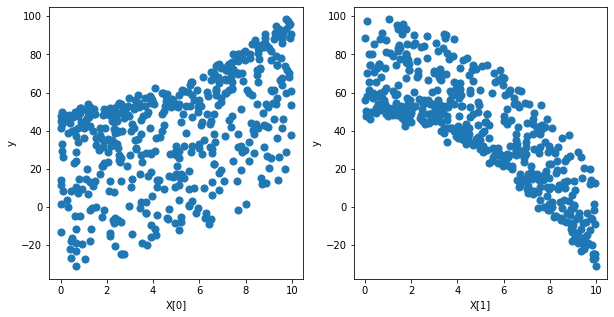

In [4]:
fig,ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].scatter(X[:,0],y,s=50)
ax[0].set_xlabel('X[0]')
ax[0].set_ylabel('y')
ax[1].scatter(X[:,1],y,s=50)
ax[1].set_xlabel('X[1]')
ax[1].set_ylabel('y')

#add the 2nd plot

Now try fitting it with plain vanilla linear regression.

In [5]:
linreg = LinearRegression()
linreg.fit(X, y)
slopes = linreg.coef_
intercept = linreg.intercept_
print(intercept,slopes)

55.247473062733654 [ 5.00637213 -8.02128854]


Plot some of those trends.  We first need a grid of X values for the sake of plotting.

In [6]:
Xgrid0 = np.linspace(X[:,0].min(),X[:,0].max(),50)
ypred0 = slopes[0]*Xgrid0 + intercept

Xgrid1 = np.linspace(X[:,1].min(),X[:,1].max(),50) #Complete
ypred1 = slopes[1]*Xgrid1 + intercept #Complete

Now plot the data and the best fit.

Text(0, 0.5, 'y')

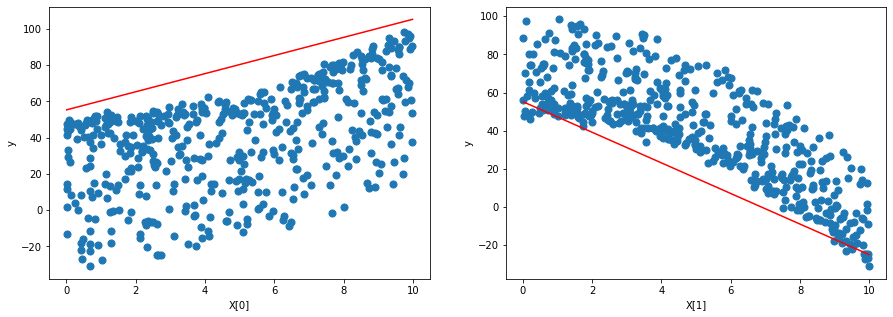

In [7]:
%matplotlib inline
fig,ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].scatter(X[:,0],y,s=50)
ax[0].plot(Xgrid0,ypred0,"r-")
ax[0].set_xlabel('X[0]')
ax[0].set_ylabel('y')

ax[1].scatter(X[:,1],y,s=50)
ax[1].plot(Xgrid1,ypred1,"r-")
ax[1].set_xlabel('X[1]')
ax[1].set_ylabel('y')

#add the 2nd plot

Why might the lines not go through the data?  The slopes look about right, but not the intercepts...  (Hint: Save this for after you've made the 3-D plot below.)


Because in 2D it doesn't look like the line is going through the data, but in 3D we can see it goes through the data.

Instead let's make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space.

**Note that the 3-D plotting will NOT work in Jupyter Lab.  Just Jupyter Notebooks.**

In [15]:
uu, vv = np.meshgrid(Xgrid0, Xgrid1)
Xgrid = np.array([uu.flatten(), vv.flatten()]).T
print(Xgrid.shape)

(2500, 2)


In [16]:
ypred = linreg.predict(Xgrid)
print(ypred.shape)

(2500,)


<IPython.core.display.Javascript object>


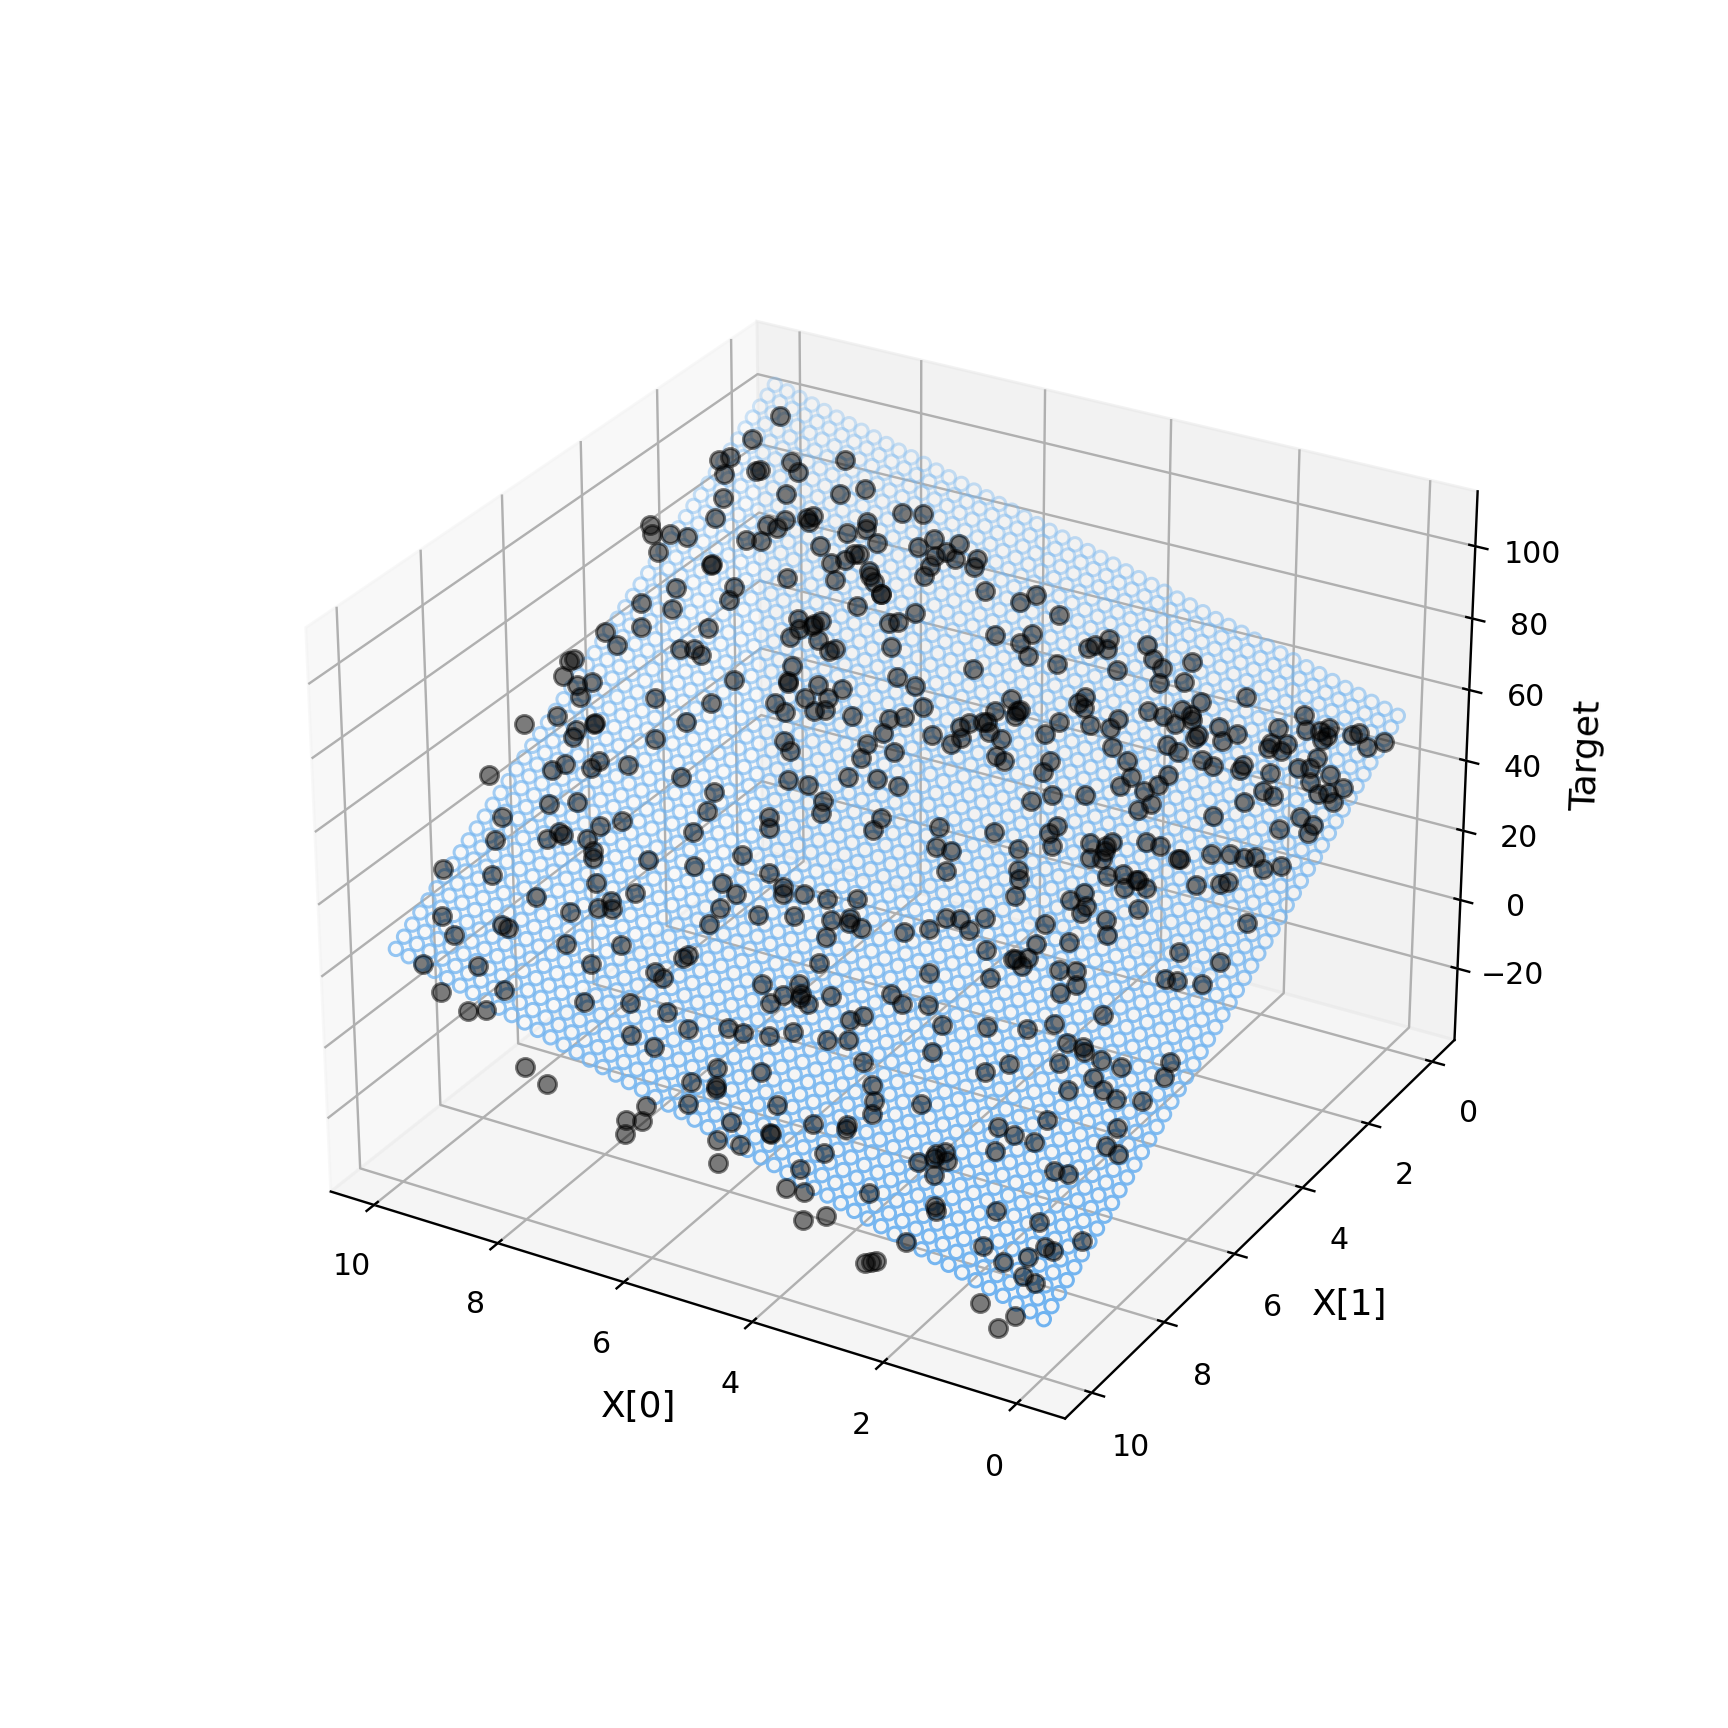

In [17]:
#Makes the plot interactive.  You can rotate it
#Sometimes I have to run this cell twice
%matplotlib notebook  
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypred, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [18]:
#turn off "notebook" plotting
%matplotlib inline

---

Now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```

In [19]:
from sklearn.linear_model import Ridge
ridge_params = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0], 'solver': ['svd', 'lsqr']
}

In [21]:
ridgeGrid = GridSearchCV(estimator=Ridge(), param_grid = ridge_params)
ridgeGrid.fit(X,y,sample_weight=1/dy**2)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.5, 1.0],
                         'solver': ['svd', 'lsqr']})

What are the `best_params_` and the `best_score_` from this? 

In [22]:
print(ridgeGrid.best_params_)
print(ridgeGrid.best_score_)

{'alpha': 1.0, 'solver': 'svd'}
0.9096693408852019


Fit the data with the best options, and visualize interactively.

In [27]:
ridgeReg = Ridge(alpha=0.05,solver='svd')
ridgeReg.fit(X,y,sample_weight=1/dy**2)
ypredRidge = ridgeReg.predict(Xgrid)

<IPython.core.display.Javascript object>


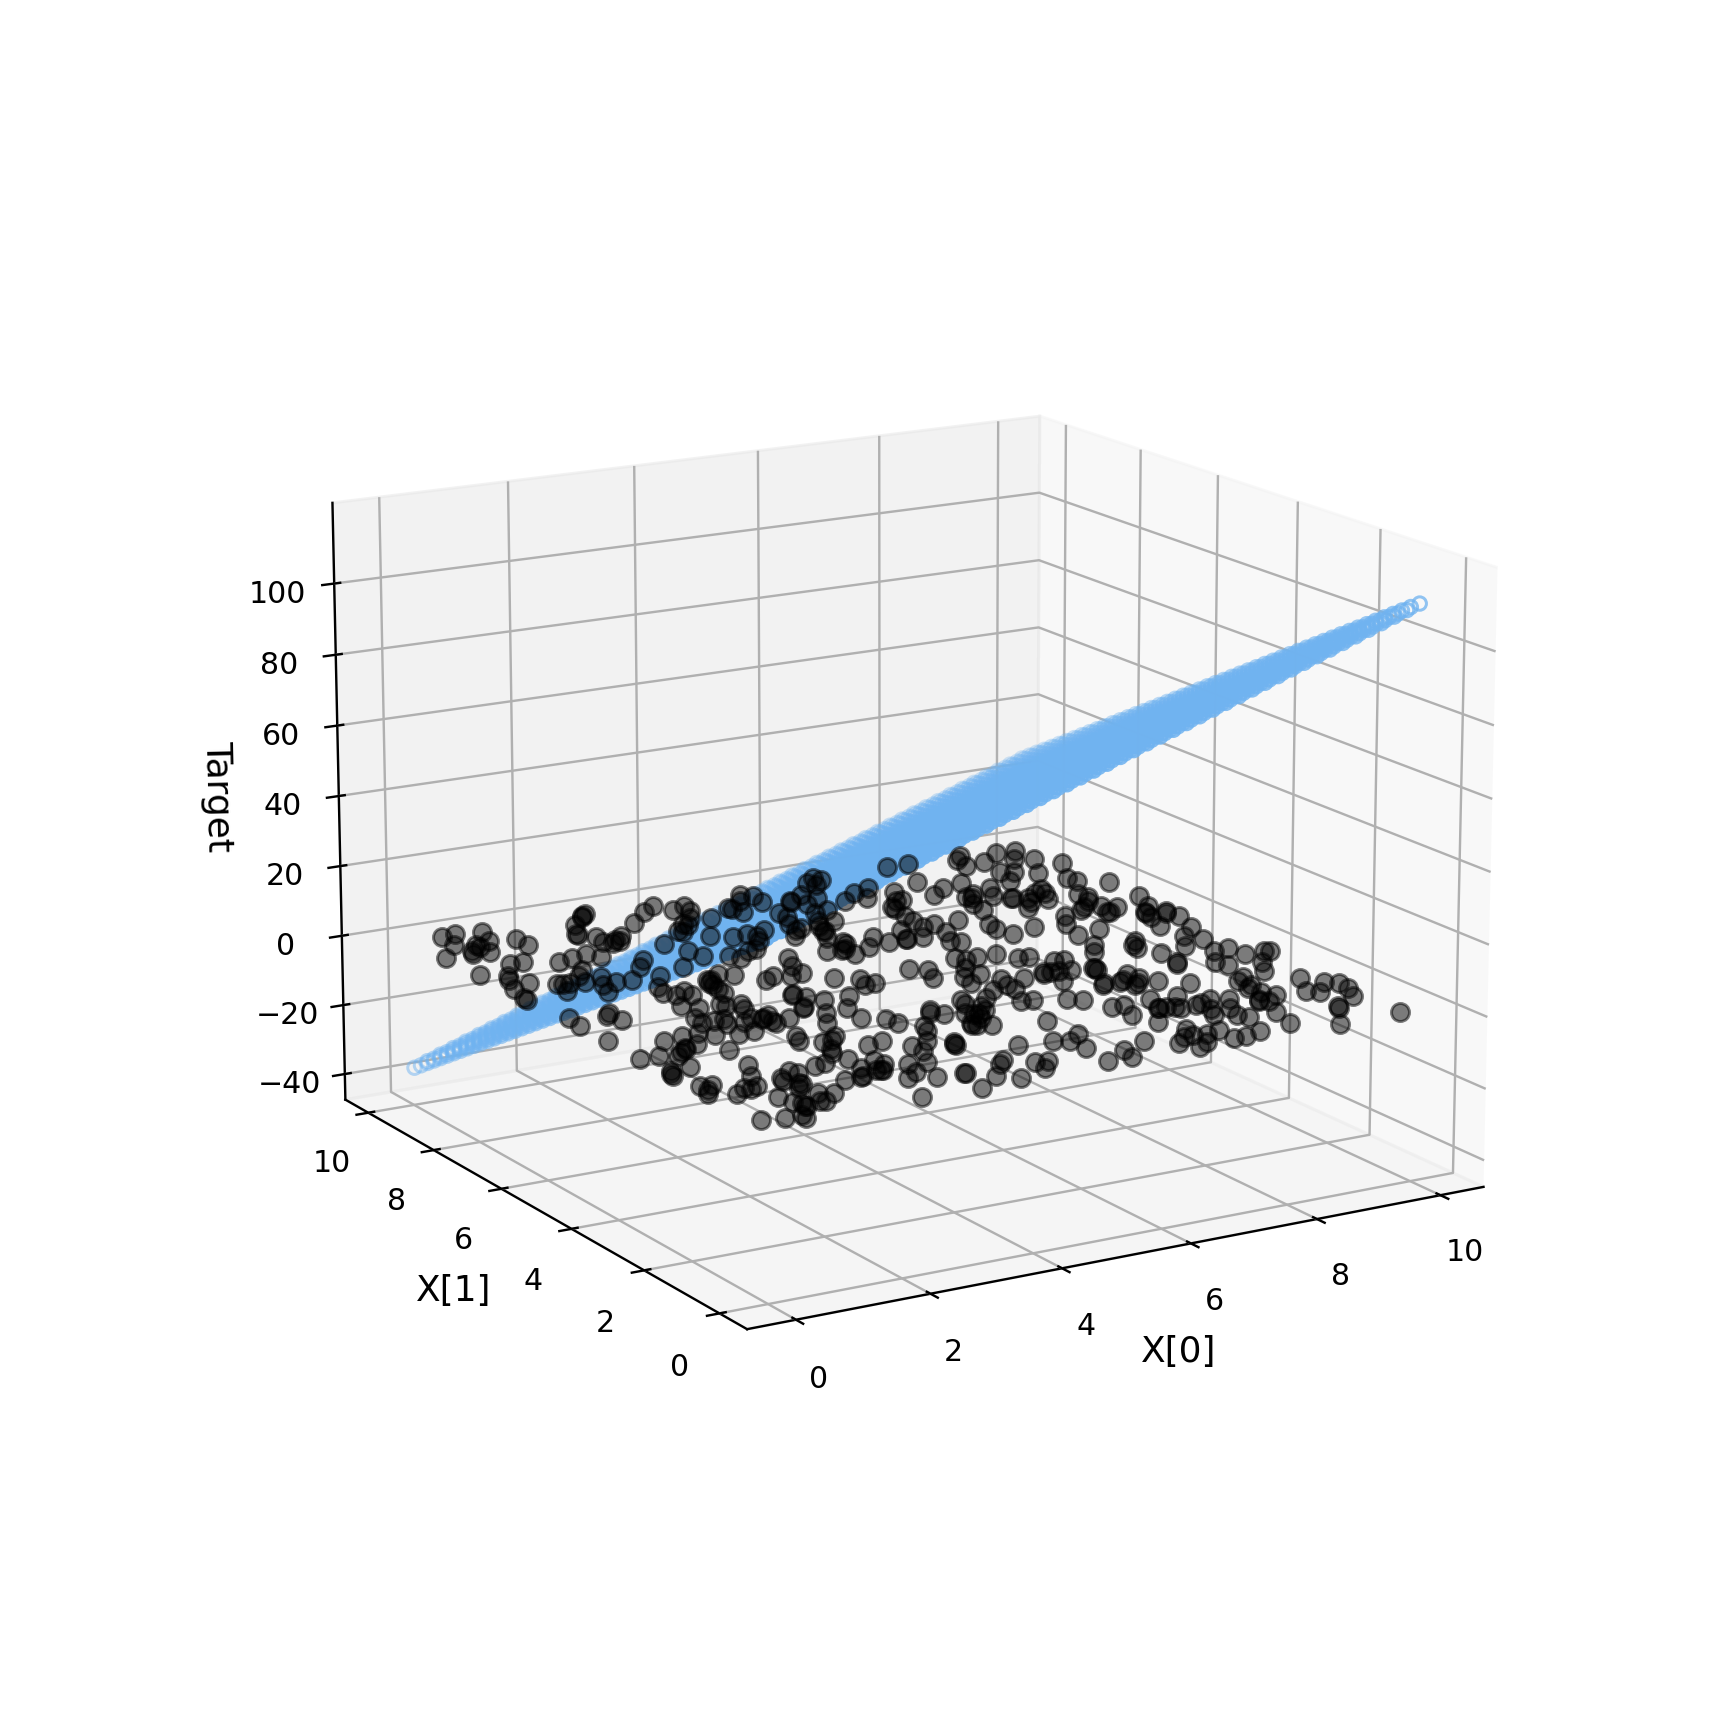

/tmp/ipykernel_25351/2486706736.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "--" (-> linestyle='--'). The keyword argument will take precedence.
  ax.plot(X[:,0], X[:,1], '--', color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)


In [28]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], '--', color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypredRidge, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [29]:
#turn off "notebook" plotting
%matplotlib inline

Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`?

In [30]:
from sklearn.linear_model import RidgeCV

ridgeCv = GridSearchCV(estimator=Ridge(), param_grid = ridge_params)
ridgeCv.fit(X,y,sample_weight=1/dy**2)
ridgeCv.predict(Xgrid)

array([49.26658323, 50.5410108 , 51.81543837, ..., 23.2589698 ,
       24.53339737, 25.80782494])

Running Ridge Regression in this case doesn't really make sense.   Why not?  

Due to the data not being linearly correlated.

---

Now perform Nadaraya-Watson regression on the data, using a Gaussian kernel with a bandwidth of $0.2$. Visualize interactively as before. How does this look compared to previous models?

In [43]:
from astroML.linear_model import NadarayaWatson
nwreg = NadarayaWatson('gaussian',h=1)
nwreg.fit(X,y)
ypredNW = nwreg.predict(Xgrid)

<IPython.core.display.Javascript object>


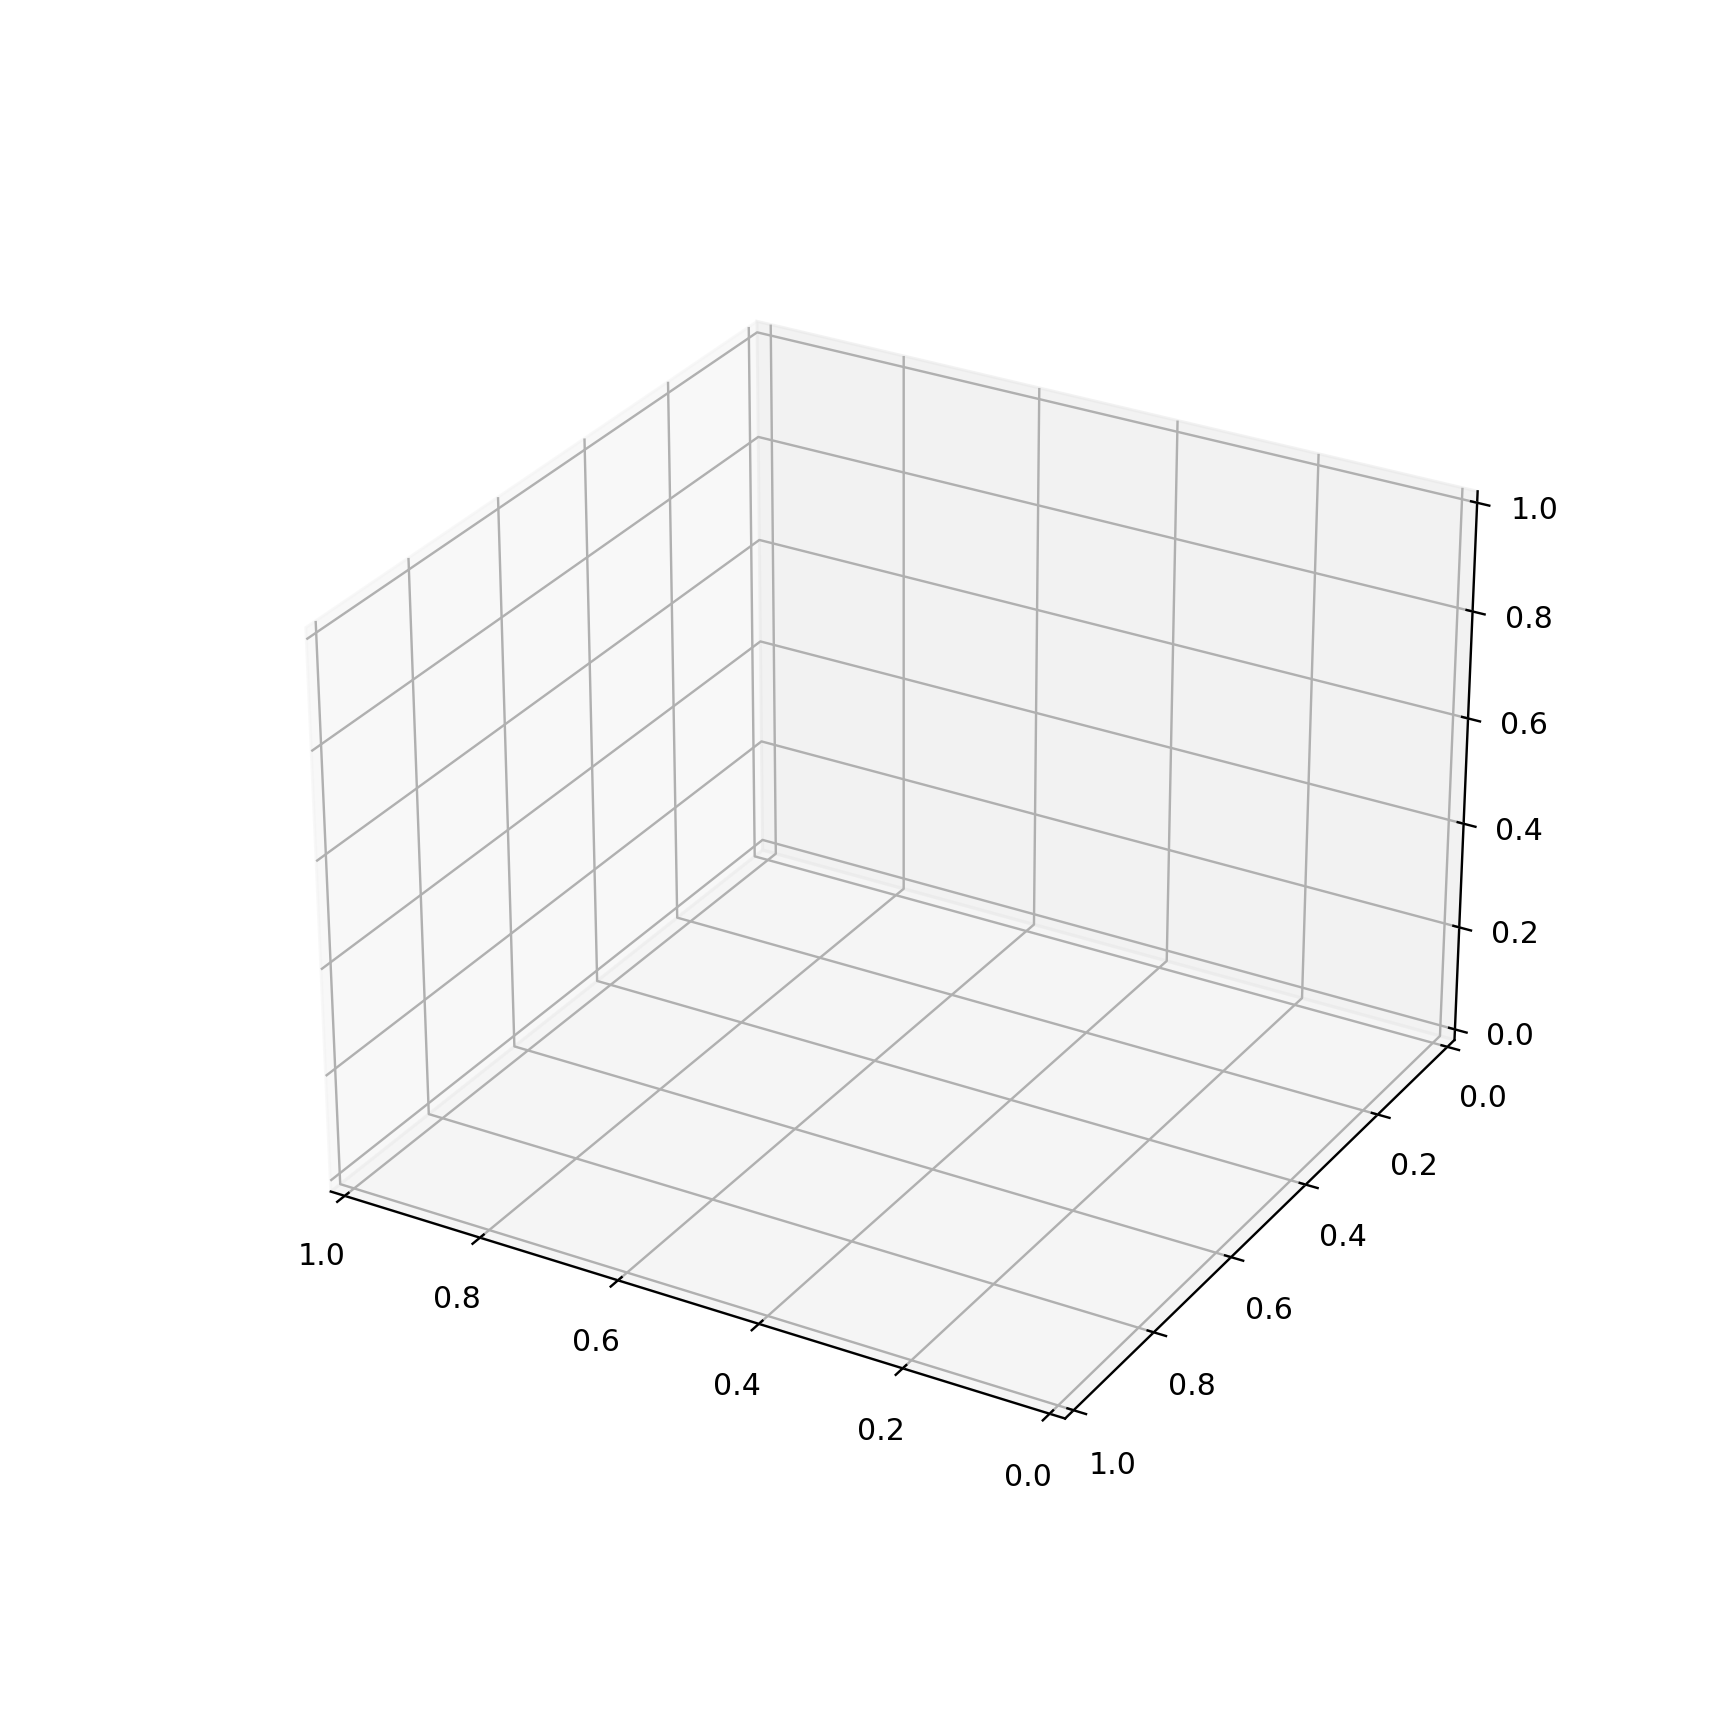

In [44]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

#Fill in from 3-D plot cells above and modify as needed.

ax.view_init(elev=28, azim=120)

In [ ]:
#turn off "notebook" plotting
%matplotlib inline

How does this look compared to previous models?
    
***Put ~1 sentence answer here***

---

Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(dy/y)**2`.)*

In [45]:
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor(alpha=(dy/y)**2)  #Do once with errors
#gp = GaussianProcessRegressor()  #And once without
gp.fit(X,y)
ypredGP, dypredGP = gp.predict(Xgrid, return_std=True)

<IPython.core.display.Javascript object>


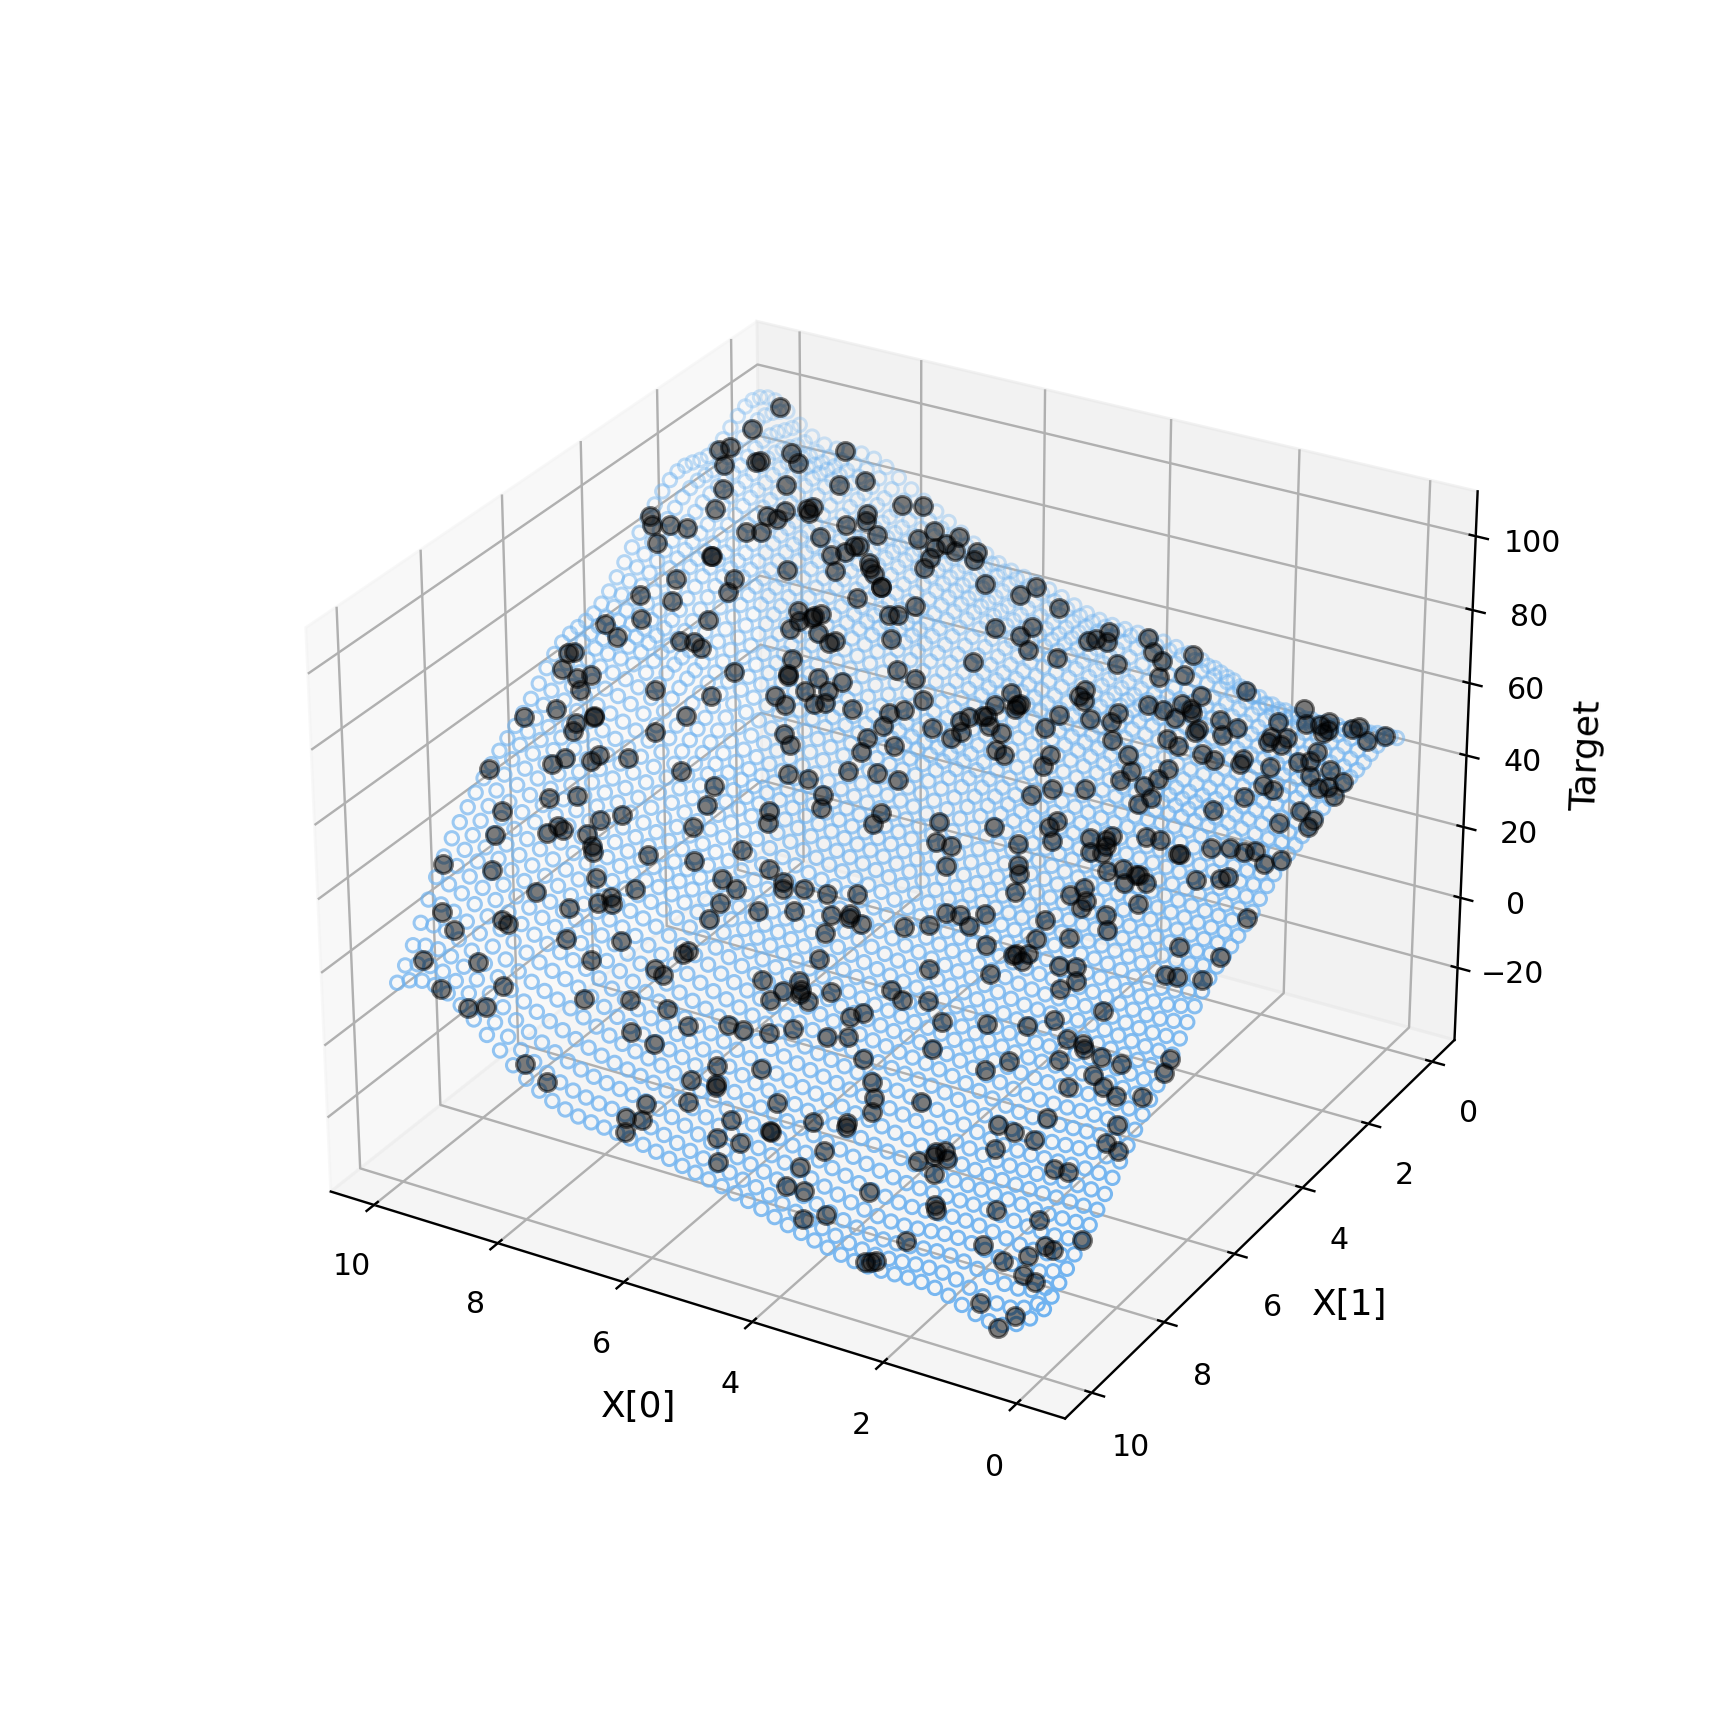

In [46]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypredGP, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

What difference do you see when including/excluding the uncertinties?
    
Without uncertainties, the datad does not follow the trajectory of the plane.

---

Finally let's at polynomial fitting. Fit a $4$th degree polynomial to the data. Predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?

In [48]:
from astroML.linear_model import PolynomialRegression
order = 4
poly = PolynomialRegression(order) # fit Nth order polynomial
poly.fit(X,y)
ypredpoly = poly.predict(Xgrid)

<IPython.core.display.Javascript object>


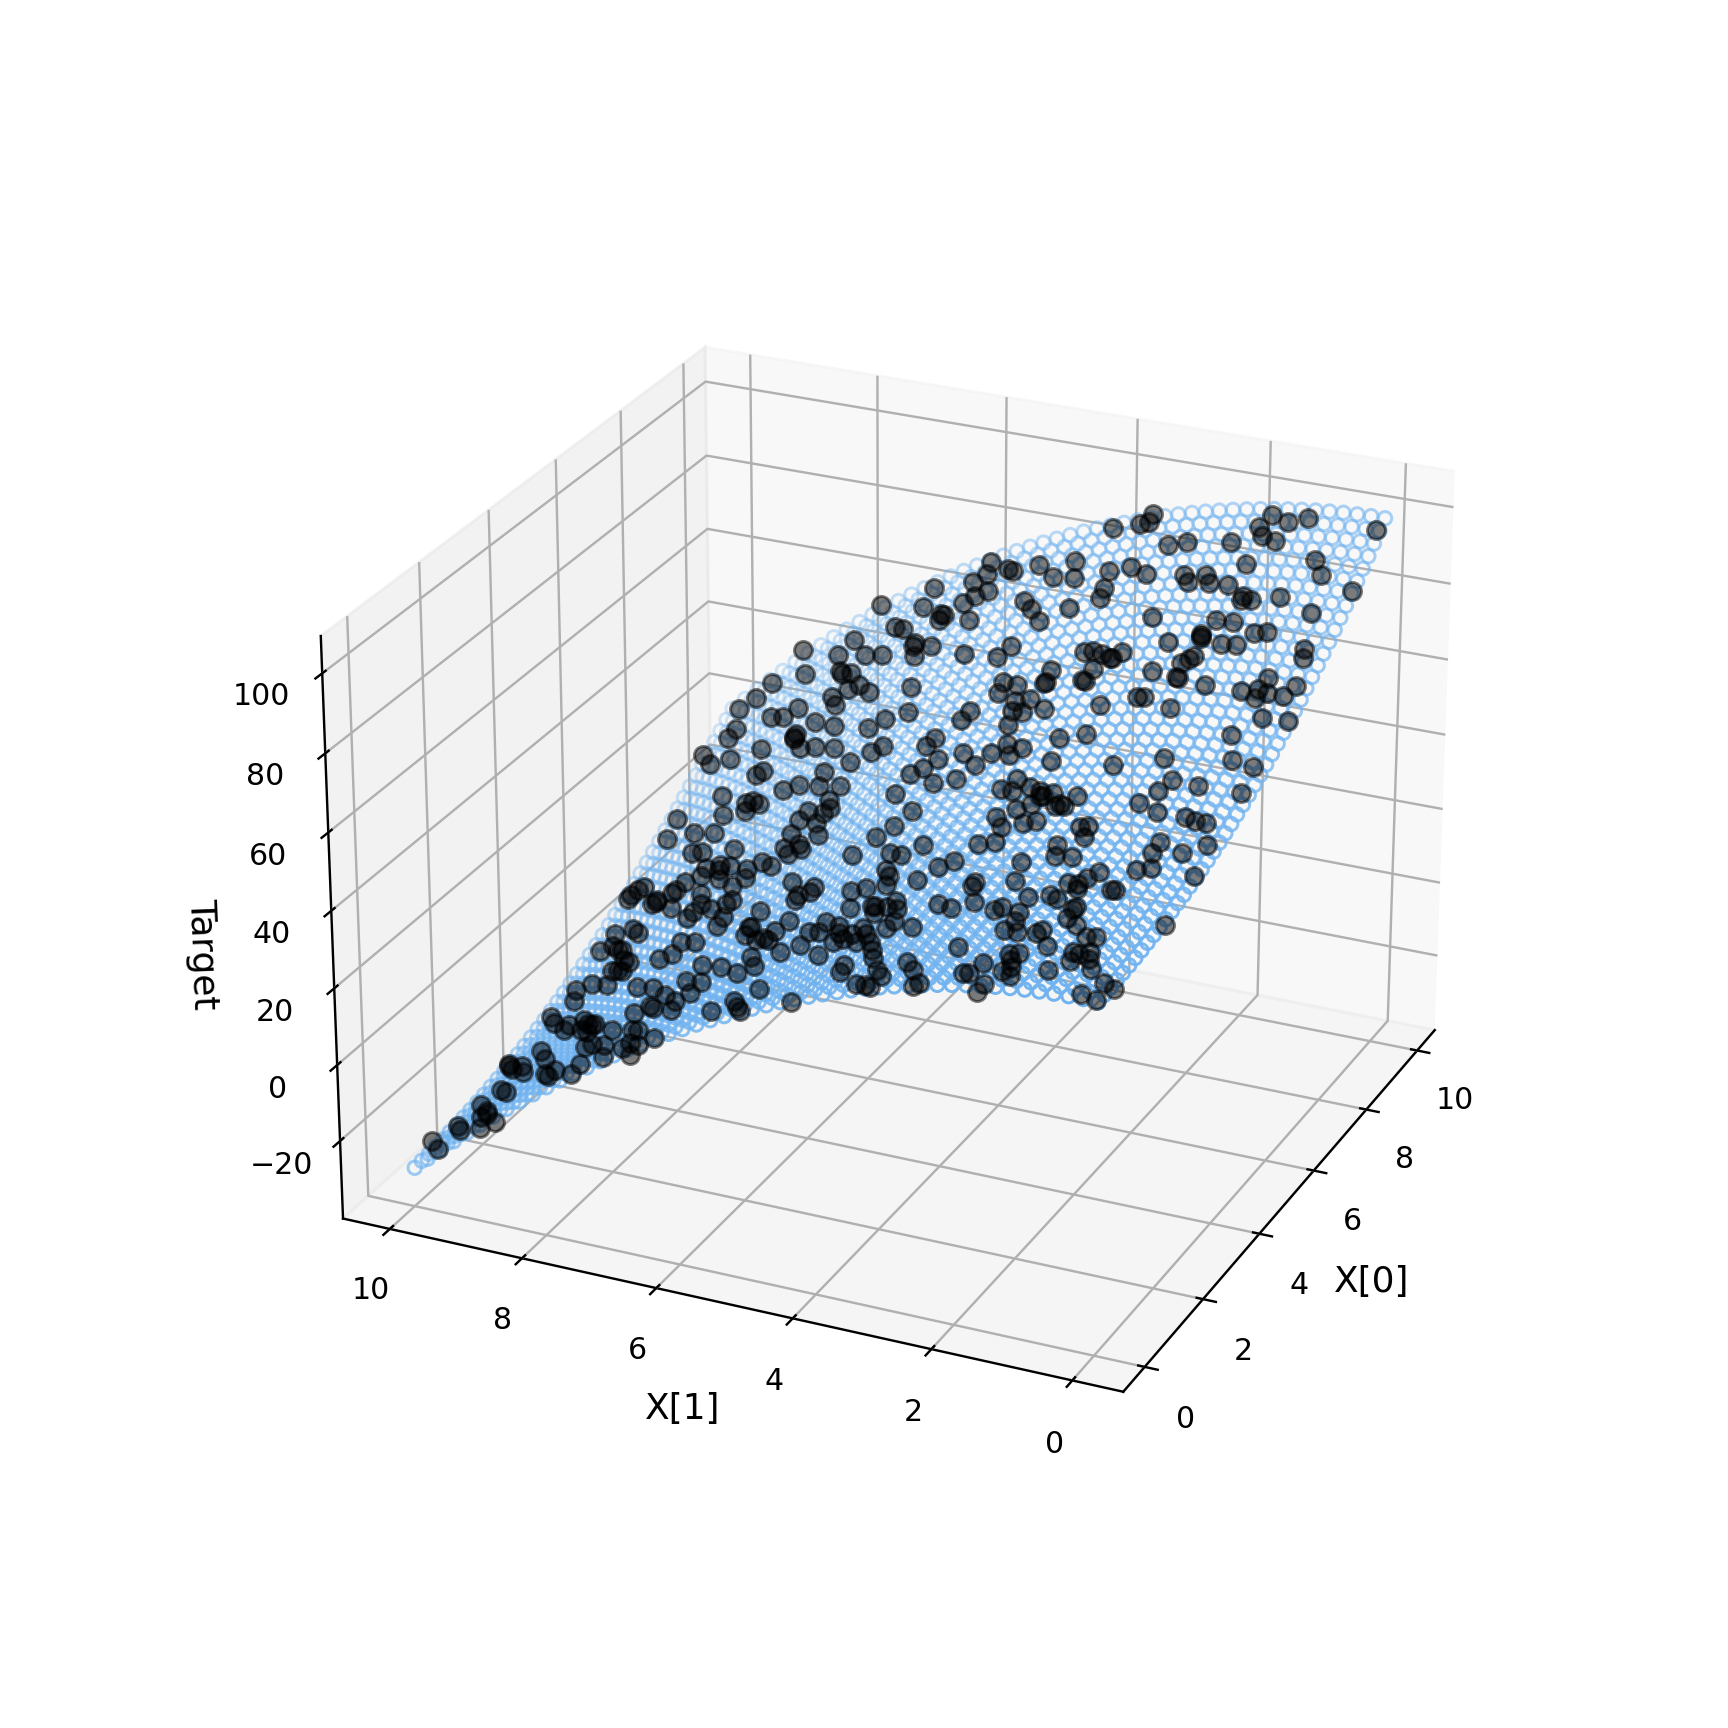

In [49]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot(X[:,0], X[:,1], y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
ax.scatter(uu.flatten(), vv.flatten(), ypredpoly, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.set_xlabel('X[0]', fontsize=12)
ax.set_ylabel('X[1]', fontsize=12)
ax.set_zlabel('Target', fontsize=12)

ax.view_init(elev=28, azim=120)

In [50]:
%matplotlib inline

Not bad!  Note that it does the polynomial regression in both dimensions of $X$.

Let's figure out the best fit polynomial model, the coefficients of that model and how well we might expect to do with unknown data.

First do a train-test split with a `train_size` of 80%.  Also split out a cross-validation set from the training set (leaving a somewhat smaller set to use for training).

In [51]:
from sklearn.model_selection import train_test_split
Xtrain, Xtestcv, ytrain, ytestcv = train_test_split(X, y, train_size=0.8, random_state=42)

Xtest, Xcv, ytest, ycv = train_test_split(Xtrain,ytrain, test_size=0.5, random_state=42)

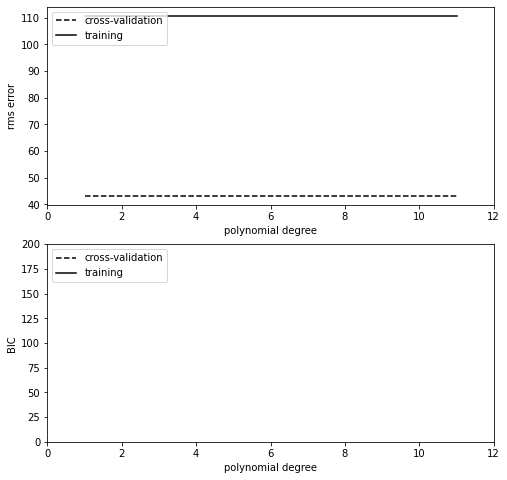

In [78]:
#import PolynomialRegression
from astroML.linear_model import PolynomialRegression

degrees = np.arange(1, 12)
training_err = np.zeros(degrees.shape)
crossval_err = np.zeros(degrees.shape)

fig = plt.figure(figsize=(8, 8))
for i,d in enumerate(degrees):
    #print(i,d)
    poly = PolynomialRegression(degree=order)

    poly.fit(X,y)
    
    ypredTrain = poly.predict(Xgrid)
    ypredCV = poly.predict(Xcv)
    
    training_err[i] = np.sqrt(np.sum((ypredTrain - Xgrid[:,0]) ** 2)/len(ytrain))
    
    crossval_err[i] = np.sqrt(np.sum((ypredCV - Xcv[:,0]) ** 2)/len(ycv))
    

BIC_train = np.sqrt(len(y)) * training_err + degrees * np.log(len(y))
BIC_crossval = np.sqrt(len(y)) * crossval_err + degrees * np.log(len(y))

ax = fig.add_subplot(211)
ax.plot(degrees, crossval_err, '--k', label='cross-validation')
ax.plot(degrees, training_err, '-k', label='training')
#ax.plot(degrees, 0.1 * np.ones(degrees.shape), ':k')

ax.set_xlim(0, 12)

#ax.set_xlim(0, 14)
#ax.set_ylim(0, 0.8)

ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc=2)

ax = fig.add_subplot(212)
ax.plot(degrees, BIC_crossval, '--k', label='cross-validation')
ax.plot(degrees, BIC_train, '-k', label='training')

ax.set_xlim(0, 12)
ax.set_ylim(0, 200)

ax.legend(loc=2)
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()

Now use an 8th order model (so, not the best fit) to predict the error on unseen data.

In [79]:
order = 8
poly = PolynomialRegression(order)
poly.fit(X,y)

ypredTest = poly.predict(Xgrid)

In [81]:
test_err = np.sqrt(np.sum((ypredTest - Xgrid[:,0]) ** 2)/len(ytest))
print(test_err)

156.47111229111454


What was the training error for that model? 

In [82]:
train_err = np.sqrt(np.sum((ypredTrain - Xgrid[:,0]) ** 2)/len(ytrain))
print(train_err)

110.64178456084883


What does that mean in terms of the importance of doing train-test splitting?

Train-test splitting is very important. As we can see, the error on one is much greater than the other